<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tests-simples" data-toc-modified-id="Tests-simples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tests simples</a></span><ul class="toc-item"><li><span><a href="#Variance-connue" data-toc-modified-id="Variance-connue-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variance connue</a></span></li><li><span><a href="#Variance-inconnue" data-toc-modified-id="Variance-inconnue-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variance inconnue</a></span><ul class="toc-item"><li><span><a href="#Question-2---c-:-RatWeight" data-toc-modified-id="Question-2---c-:-RatWeight-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Question 2 - c : RatWeight</a></span></li></ul></li><li><span><a href="#Test-non-paramétrique" data-toc-modified-id="Test-non-paramétrique-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Test non paramétrique</a></span><ul class="toc-item"><li><span><a href="#Question-3---a-:" data-toc-modified-id="Question-3---a-:-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Question 3 - a :</a></span></li><li><span><a href="#Question-3---b-:" data-toc-modified-id="Question-3---b-:-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Question 3 - b :</a></span><ul class="toc-item"><li><span><a href="#Puissance-du-test-de-WMW" data-toc-modified-id="Puissance-du-test-de-WMW-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Puissance du test de WMW</a></span></li><li><span><a href="#Puissance-du-test-chi-2-d'homogénéité" data-toc-modified-id="Puissance-du-test-chi-2-d'homogénéité-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Puissance du test chi 2 d'homogénéité</a></span></li><li><span><a href="#Nota-Bene-(ça-ne-marche-pas-...)" data-toc-modified-id="Nota-Bene-(ça-ne-marche-pas-...)-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Nota Bene (ça ne marche pas ...)</a></span></li><li><span><a href="#Puissance-du-test-chi-2-d'adéquation" data-toc-modified-id="Puissance-du-test-chi-2-d'adéquation-1.3.2.4"><span class="toc-item-num">1.3.2.4&nbsp;&nbsp;</span>Puissance du test chi 2 d'adéquation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Tests-multiples" data-toc-modified-id="Tests-multiples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tests multiples</a></span><ul class="toc-item"><li><span><a href="#Approche-naïve-des-tests-multiples" data-toc-modified-id="Approche-naïve-des-tests-multiples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Approche naïve des tests multiples</a></span><ul class="toc-item"><li><span><a href="#Question-4---b-:-Leucémie" data-toc-modified-id="Question-4---b-:-Leucémie-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Question 4 - b : Leucémie</a></span></li></ul></li><li><span><a href="#Contrôle-de-la-&quot;Family-Wise-Error-Rate&quot;" data-toc-modified-id="Contrôle-de-la-&quot;Family-Wise-Error-Rate&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Contrôle de la "Family-Wise Error Rate"</a></span><ul class="toc-item"><li><span><a href="#Question-5---a-:" data-toc-modified-id="Question-5---a-:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Question 5 - a :</a></span></li><li><span><a href="#Question-5---b-:" data-toc-modified-id="Question-5---b-:-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Question 5 - b :</a></span></li></ul></li><li><span><a href="#Question-6-:-Procédure-de-Benjamini-Hochberg" data-toc-modified-id="Question-6-:-Procédure-de-Benjamini-Hochberg-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 6 : Procédure de Benjamini-Hochberg</a></span></li></ul></li></ul></div>

# Tests simples

## Variance connue

## Variance inconnue

### Question 2 - c : RatWeight

In [1]:
## On importe les données
ratWeight <- read.csv(file="ratWeight_sujet3.csv", header=TRUE, sep=",")

In [2]:
head(ratWeight)

id,week,weight,regime,gender,dosage
B38602,1,236.1,Control,Male,11%
B38602,2,282.6,Control,Male,11%
B38602,3,336.0,Control,Male,11%
B38602,4,376.8,Control,Male,11%
B38602,5,403.9,Control,Male,11%
B38602,6,414.3,Control,Male,11%


In [3]:
## Nombre de lignes au total
nrow(ratWeight)

[1] 2235

In [4]:
## On sélectionne la 14ème semaine
ratW14<-ratWeight[ratWeight$week==14,]
nrow(ratW14)

[1] 158

In [5]:
X_new=ratW14[ratW14$regime == 'GMO',] ## Groupe sous OGM
Y_new=ratW14[ratW14$regime == 'Control',] ## Groupe témoin

In [6]:
X=X_new$weight
Y=Y_new$weight

In [7]:
length(X)

[1] 79

In [8]:
length(Y)

[1] 79

In [9]:
#T.test classique : sans tenir compte de la question 2-c)
results=t.test(X, Y, alternative = c("two.sided"), paired = FALSE, var.equal = FALSE,conf.level = 0.95)
print(results)


	Welch Two Sample t-test

data:  X and Y
t = -0.15039, df = 154.6, p-value = 0.8807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -39.77593  34.14809
sample estimates:
mean of x mean of y 
 391.6911  394.5051 



In [10]:
## On a supposé H0 : μ1=μ2 contre H1: μ1≠μ2
## D'après la question 2-c) nous allons effectuer un test de student à un niveau α=5%
# Préparation de l'estimateur de la variance de l'échantillon Z(X,Y) d'après 2-b)
nX=length(X)
nY=length(Y)
estvarx= (nX/(nX-1))*var(X)
estvary= (nY/(nY-1))*var(Y)
estvarz=((nX-1)/(nX+nY-2))*estvarx + ((nX-1)/(nX+nY-2))*estvary
print(estvarx)
print(estvary)
print(estvarz)

[1] 12672.15
[1] 15340.13
[1] 14006.14


In [11]:
#Implémentation du T test de la question 2-c)
Xbar=mean(X)
Ybar=mean(Y)

t= (Xbar-Ybar/sqrt(estvarz*(1/nX + 1/nY)))
print(t)
df = nX+nY-2
print(df)

[1] 370.7408
[1] 156


In [12]:
qt(c(.025, .975), df=df)
pt(t,df=df)

[1] -1.975288  1.975288

[1] 1

La valeur critique pour une t156,0.025 pour un test bilatéral vaut 1.975

Or, comme t=0.1494348 < 1.975 : La p-value est plus basse que pour le test de base mais reste extrêment élevée : 0.44>>0.05

L'hypothèse H0 : "Les moyennes des deux échantillons sont égales" est rejetée au seuil de 5%

In [13]:
#interval de confiance de l'écart des moyennes : 
IC = 1.975*sqrt(estvarz*(1/length(X) + 1/length(Y)))
print(IC)

[1] 37.19014


## Test non paramétrique 

### Question 3 - a : 

In [14]:
get_Ranked_R1<-function(x,y){
## Fonction dans laquelle on met deux vecteurs x et y et on a la somme des rangs du premier dans le vecteur total (R1 de l'énoncé) 
    m=length(x)+length(y)
    df_1<-data.frame(data=x,type=1)
    df_2<-data.frame(data=y,type=0)
    df<-rbind(df_1,df_2)
    or<-df[order(df$data),]
    return(sum((or$type==1)*(1:m)))
}    

Le $R_1$ de nos données est :

In [15]:
get_Ranked_R1(X,Y)

[1] 6311

In [16]:
get_Quantile_empirique<-function(x,alpha){
## Fonction pour obternir le quantil empirique de niveau alpha de l'échantillon x
    rank=floor(length(x)*alpha)+1
    return(x[order(x)][rank])
}

In [17]:
estim_quantil_R1<-function(n1,n2,alpha,m){
## Estimation du quantil de niveau alpha de R1 
## n1 le nombre d'échantillons dans le premier groupe, n2 pour le deuxième groupe
## m le nombre de simulation de R1 que l'on souhaite faire pour approximer le quantil
    x<-c()
    for (i in 1:m) {
        y1<-runif(n1,0,1)
        y2<-runif(n2,0,1)
        x<-c(x,get_Ranked_R1(y1,y2))
    }
    return(get_Quantile_empirique(x,alpha))
}

In [18]:
evolE<- function(x){              
##evolution estimateurde de Monte Carlo
  return(cumsum(x)/(1:length(x)))
}

evolIC <- function(x, delta, level) {  
##evolution interval de confiance de niveau estimateurde de Monte Carlo
  n <- length(x)
  s2 <- (cumsum(x^2) - (1:n) * (delta)^2)/(0:(n - 1)) 
  IC <- qnorm(0.5 * (level + 1)) * sqrt(s2/(1:n))     ##calcul de q* racindeVar 
  return(data.frame(var = s2, born_inf_IC = delta - IC,born_sup_IC = delta + IC))
}


In [19]:
MC <- function(y,lev,constante) {   ##Methode de monte carlo classique
  a<-evolE(y)        ## on recupere l'evolution de l'estimateur
  b<-evolIC(y,a,lev) ## on recupere l'evolution de l'intervalle de confiance
  n<-length(y)
  par(mfrow=c(1,1))
  plot(1:n, a, type = "l", lwd = 2, col = "darkorange1",main = "Evolution de l'estimation de Monte Carlo", ylim = c(-0.2,min(c(max(b$born_sup_IC[-1])+0.3),10)), xlab = "n",ylab="y")
  lines(2:n, b$born_inf_IC[-1], col = "deepskyblue3", lwd = 2)
  lines(2:n, b$born_sup_IC[-1], col = "deepskyblue3", lwd = 2)
  lines(1:n, rep(constante,n), col = "deeppink", lwd = 2)
  legend("topright", c("Intervalle de confiance", "estimateur de Monte Carlo",constante), lwd = c(3, 1),
         col = c("deepskyblue3", "darkorange1","deeppink"), inset = 0.05, bg = "gray95",
         box.lty = 0)
  return(data.frame(valeur_estimateur_MC=a[n],b[n,]))
}

In [20]:
tester_quantil_empirique<-function(n1,n2,mq,mmc,alpha){
    
    q_emp<-estim_quantil_R1(n1,n2,alpha,mq)
    print(paste0("Le quantil empirique est : " , q_emp))
    x<-c()
    for (i in 1:mmc){
        y1<-runif(n1,0,1)
        y2<-runif(n2,0,1)
        x<-c(x,1*(get_Ranked_R1(y1,y2)<=q_emp))
    }
       
    MC(x,0.5,alpha)
    
}

[1] "Le quantil empirique est : 5744"


,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,0.027,0.0262973,0.02354116,0.03045884


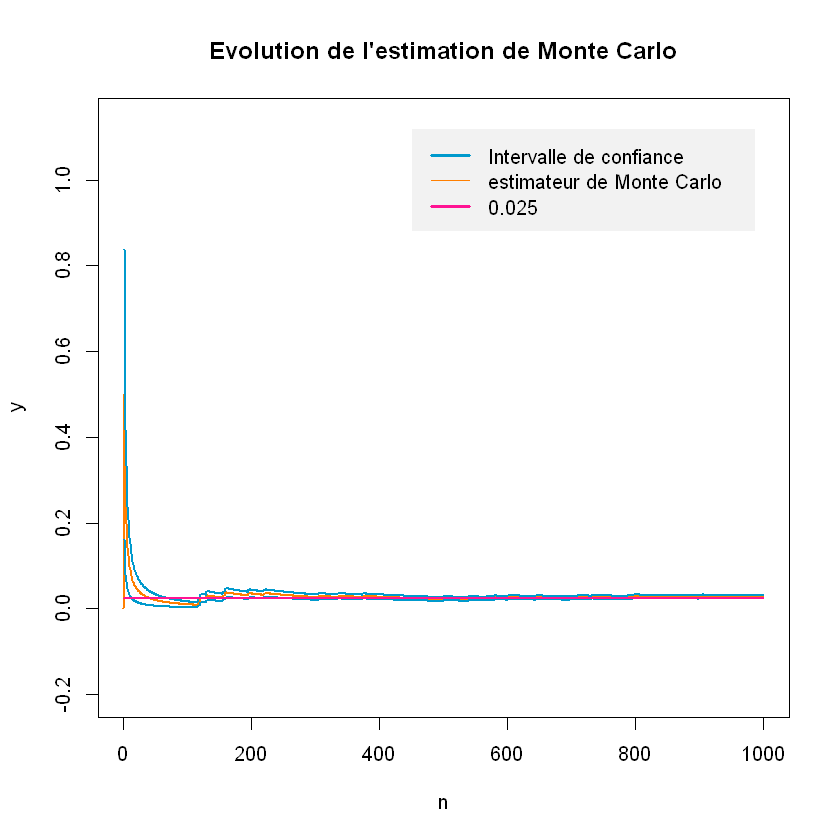

In [21]:
set.seed(25) ## Pour pouvoir reproduire les résultats 

## Les arguments sont : 
## (Nombres dans groupe 1, nombre dans groupe 2, nombre pour quantil empirique, nombre pour MC, niveau quantil)

tester_quantil_empirique(79,79,1000,1000,0.025)  


[1] "Le quantil empirique est : 6837"


,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,0.974,0.02534935,0.9706041,0.9773959


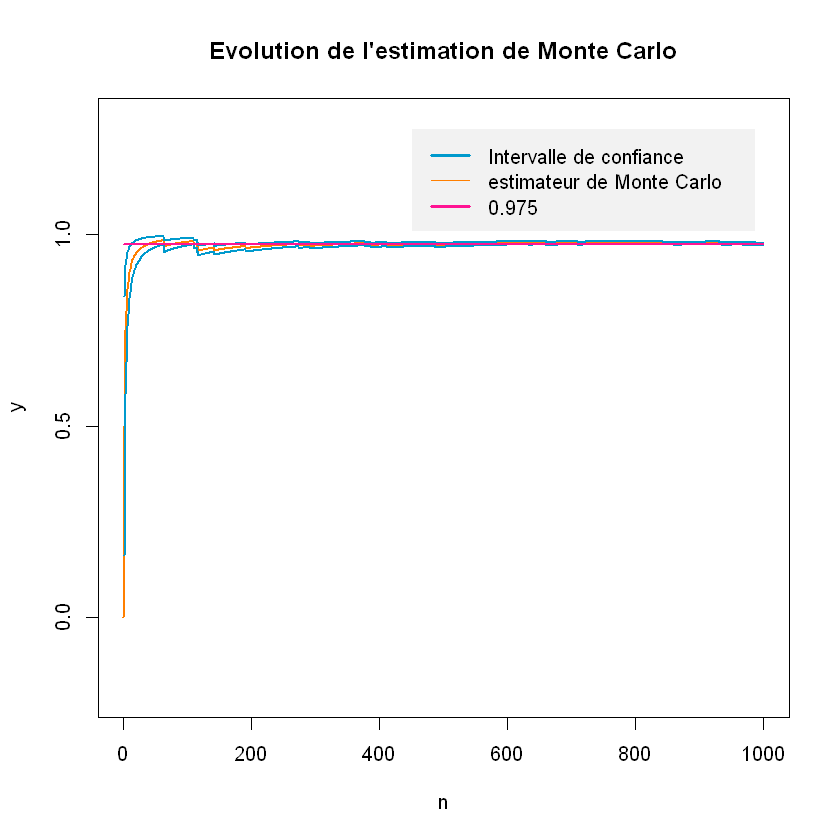

In [22]:
set.seed(25) ## Pour pouvoir reproduire les résultats 
tester_quantil_empirique(79,79,1000,1000,0.975)  


### Question 3 - b :

In [23]:
## fonction pour obtenir la statistique de Wilcoxon-Mann-Whitney
get_stat_Wilcoxon_MW<-function(x,y){
    n1=length(x)
    n2=length(y)
    mu=(n1*(n1+n2+1))/2
    sigma=mu*(n2/6)
    return ((get_Ranked_R1(x,y)-mu)/sqrt(sigma))
}

In [24]:
## fonction pour obtenir la statistique du Khi 2 d'homogénéité
get_stat_Chi2_homogene<-function(x,y,J){
    stat<-c()
    for (i in 0:(J-1)){
        N1=sum((qnorm(i/J)<=x)*(x<qnorm(((i+1)/J))))
        N2=sum((qnorm(i/J)<=y)*(y<qnorm(((i+1)/J))))
        stat<-c(stat,((N1-N2)^2)/N2)
    }
    return(sum(stat))
}

In [25]:
## On créé les échantillons WMWi et S_chi_i
## Sous H_1 les échantillons suivent des lois différentes
J=5
chi2_vect<-c()
WMW_vect<-c()
for (i in 1:1000){
    
#Sous H_1
    Z1<-rnorm(79,0.25,1)
    Z2<-rnorm(79,-0.25,1)
    
    chi2_vect<-c(chi2_vect,get_stat_Chi2_homogene(Z1,Z2,J)) 
    WMW_vect<-c(WMW_vect,get_stat_Wilcoxon_MW(Z1,Z2))
    
}

In [26]:
alpha<-0.05
WMW_vect_puiss<-1-(qnorm(alpha/2)<=WMW_vect)*(WMW_vect<qnorm(1-alpha/2))

chi2_vect_puiss<-chi2_vect>qchisq(1-alpha,J-1)

#### Puissance du test de WMW

,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,0.852,0.1262222,0.8444222,0.8595778


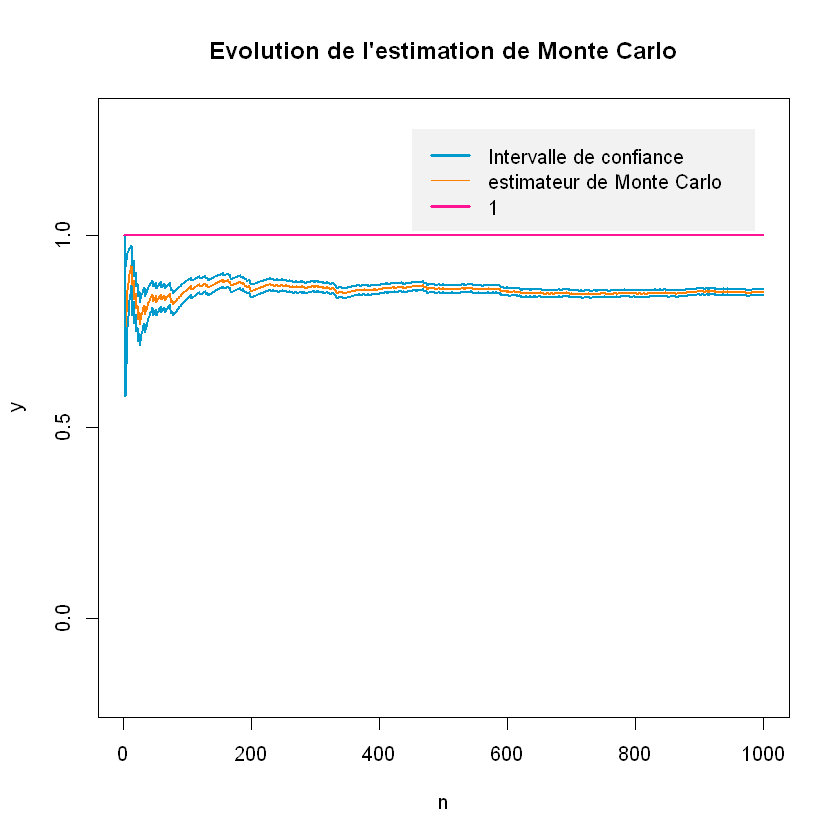

In [27]:
MC(WMW_vect_puiss,0.5,1)

#### Puissance du test chi 2 d'homogénéité

,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,0.923,0.07114214,0.917311,0.928689


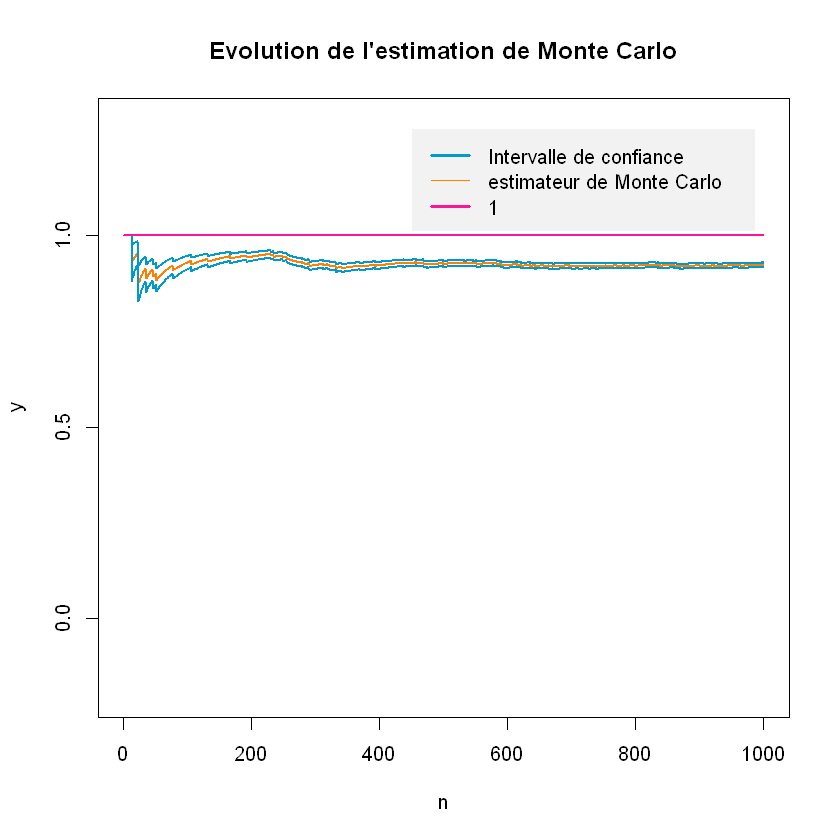

In [28]:
MC(chi2_vect_puiss,0.5,1)

#### Nota Bene (ça ne marche pas ...)

La statistique du $\chi^2$ d'adéquation n'est malheureusement pas une $\chi^2$ a J-1 degrés de liberté comme on l'a pourtant dit ...

La moyenne empirique ne converge pas vers la moyenne théorique sous $H_0$ (J-1)

In [29]:
J=3
chi2_vect<-c()
for (i in 1:1000){
## Sous H_0
    Z1<-rnorm(79,0,1)
    Z2<-rnorm(79,0,1)
     
    chi2_vect<-c(chi2_vect,get_stat_Chi2_homogene(Z1,Z2,J))
    
}

,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,4.557144,23.95841,4.452743,4.661545


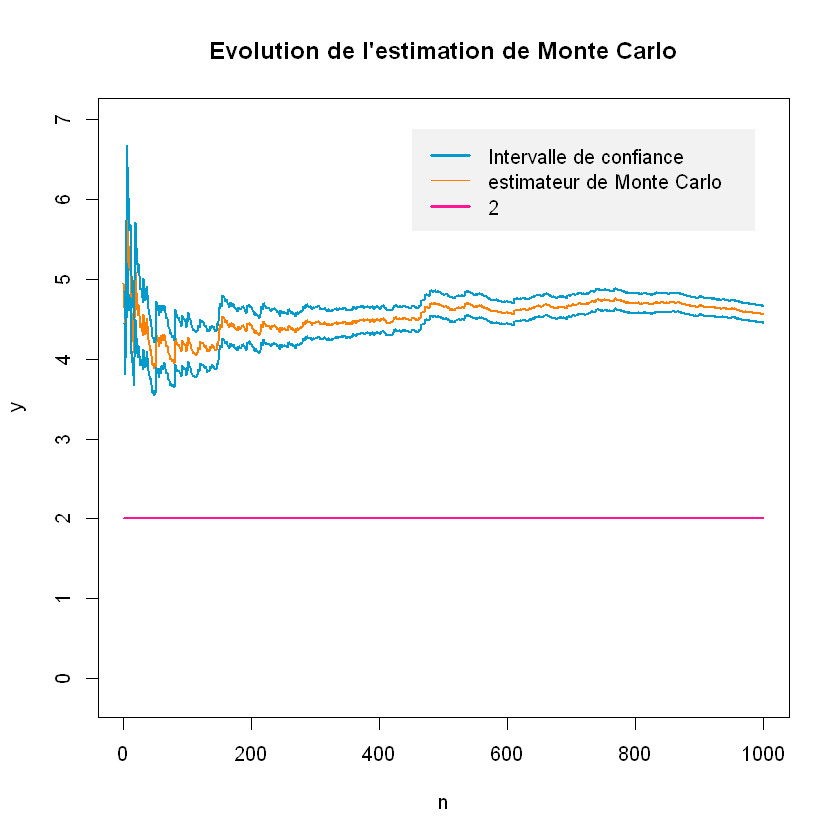

In [30]:
MC(chi2_vect,0.5,2)

Test du $\chi^2$ pour l'adéquation avec une loi normale 

In [31]:
## fonction pour obtenir la statistique du Khi 2 d'adéquation
get_stat_Chi2_adequation<-function(x,J,mu,sigma){
    m<-length(x)
    stat<-c()
    for (i in 0:(J-1)){
        N1=sum((qnorm(i/J,mu,sigma)<=x)*(x<qnorm(((i+1)/J),mu,sigma)))
        stat<-c(stat,((N1-m/J)^2)/(m/J))
    }
    return(sum(stat))
}

In [32]:
J=5
chi2_vect<-c()
for (i in 1:1000){
## Sous H_0
    Z1<-rnorm(79,0,1)
    Z2<-rnorm(79,0,1)
     
    chi2_vect<-c(chi2_vect,get_stat_Chi2_adequation(c(Z1,Z2),J,0,1))
    
}

Sous $H_0$ il semblerait qu'on a bien une $\chi^2$ a J-1 degrés de liberté

,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,3.924051,7.031411,3.867492,3.980609


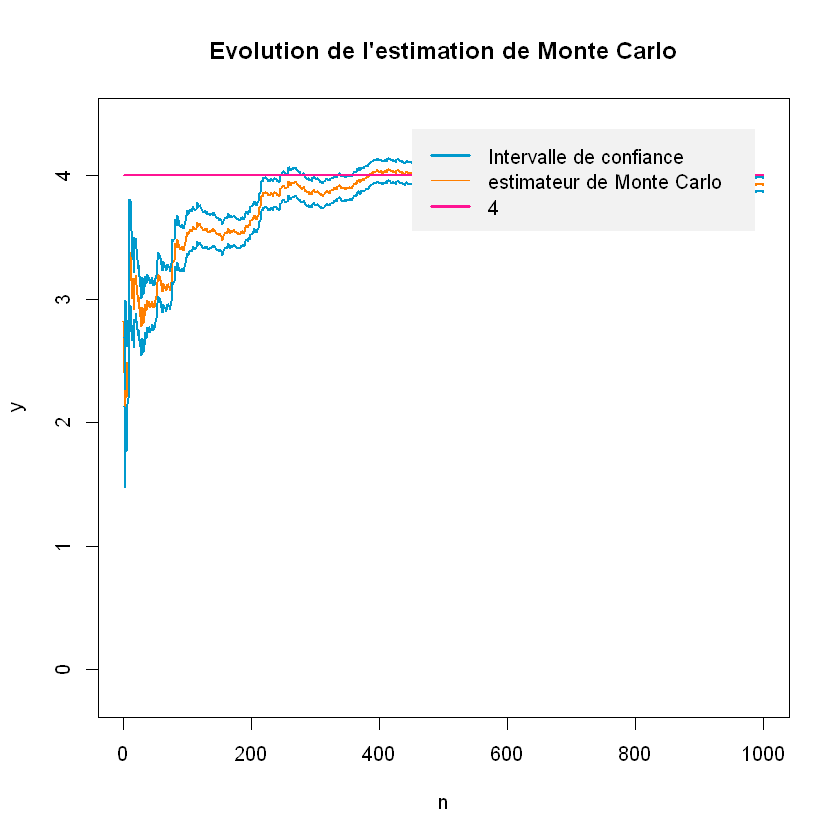

In [33]:
MC(chi2_vect,0.5,4)

#### Puissance du test chi 2 d'adéquation

On teste aussi la puissance du test d'adéquation 

In [34]:
J=5
chi2_vect<-c()
for (i in 1:1000){
## Sous H_0
    Z1<-rnorm(79,0.5,1)
    Z2<-rnorm(79,0.25,1)
     
    chi2_vect<-c(chi2_vect,get_stat_Chi2_adequation(c(Z1,Z2),J,0,1))
    
}

In [35]:
alpha<-0.05

chi2_vect_puiss<-chi2_vect>qchisq(1-alpha,J-1)

,valeur_estimateur_MC,var,born_inf_IC,born_sup_IC
1000,0.947,0.05024124,0.9422191,0.9517809


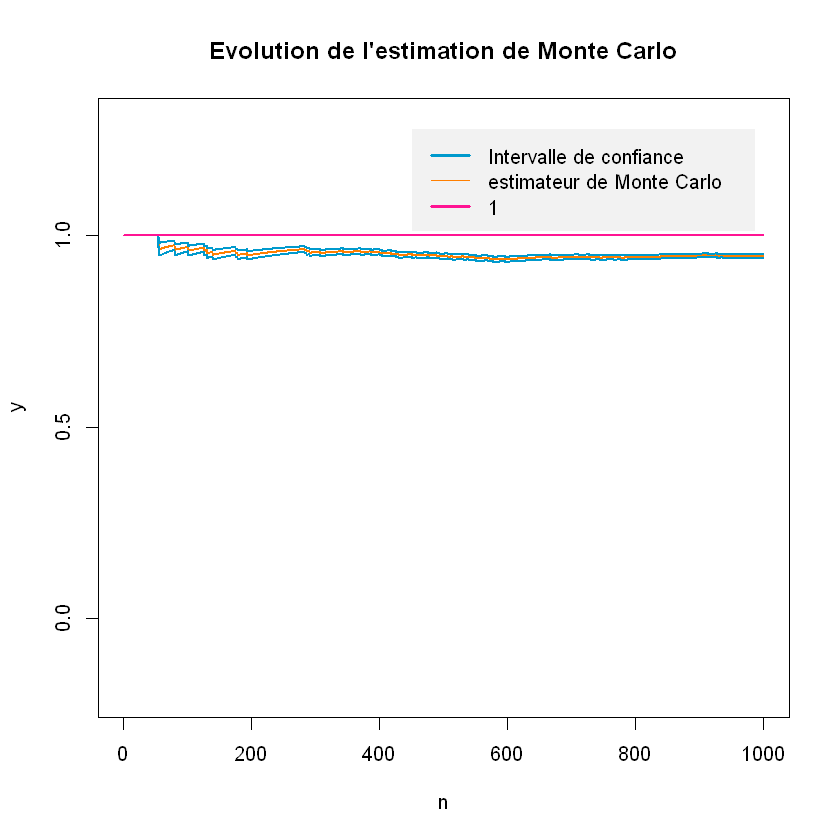

In [36]:
MC(chi2_vect_puiss,0.5,1)

# Tests multiples

## Approche naïve des tests multiples 

### Question 4 - b : Leucémie

In [37]:
# Importation des données
leucemie <- get(load('leucemie_sujet3.RData'))

In [38]:
ALL=leucemie[,1:27] ## Patients ALL
AML=leucemie[,28:38] ## Patients AML

In [39]:
#T.test bilatéral 
#H0i : "l'espérance du niveau d'expression du gène i est la même dans les deux populations"
# H1i : "l'espérance du niveau d'expression du gène i n'est pas la même dans les deux populations"

Nb = nrow(ALL)
matp_valeur<- matrix(nrow=Nb, ncol=2)
 
for (i in 1:Nb){
    X <- ALL[i,]
    Y <- AML[i,]
    res=t.test(X, Y, alternative = c("two.sided"), paired = FALSE, var.equal = FALSE,conf.level = 0.95)
    pval <- res$p.value 
    matp_valeur[i,1]= i
    matp_valeur[i,2]= pval
}
head(matp_valeur)
colnames(matp_valeur) <- c('number_gene','p_value')

1,0.1061689
2,0.3800914
3,0.9232111
4,0.7369011
5,0.1822725
6,0.2169132


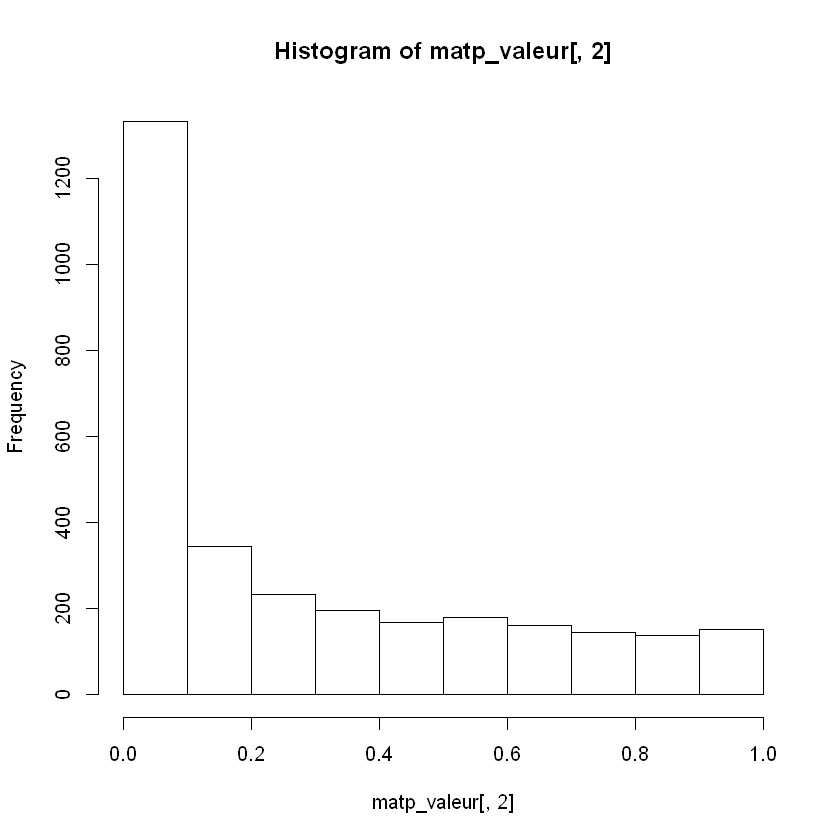

In [40]:
hist(matp_valeur[,2])

In [41]:
matp_val_ordonnees <- matp_valeur[order(matp_valeur[,2],decreasing=F),]
colnames(matp_val_ordonnees) <- c('number_gene','p_value')
print(matp_val_ordonnees)

        number_gene      p_value
   [1,]        2124 2.780971e-12
   [2,]         896 1.536819e-09
   [3,]        2600 8.423679e-09
   [4,]         766 1.577363e-08
   [5,]         829 2.279314e-08
   [6,]        2851 4.068619e-08
   [7,]         703 5.667239e-08
   [8,]        2386 5.923831e-08
   [9,]        2645 6.804829e-08
  [10,]        2002 7.230339e-08
  [11,]        2801 1.038174e-07
  [12,]        1834 1.248587e-07
  [13,]        1665 1.576777e-07
  [14,]        1334 1.594811e-07
  [15,]        2939 1.707946e-07
  [16,]        1037 2.414839e-07
  [17,]        1817 2.521401e-07
  [18,]         717 2.896491e-07
  [19,]        1086 3.700335e-07
  [20,]        3046 3.740314e-07
  [21,]        2921 3.933312e-07
  [22,]         839 4.214462e-07
  [23,]        1911 5.268689e-07
  [24,]        2829 5.342313e-07
  [25,]        1524 5.905311e-07
  [26,]        1598 6.196262e-07
  [27,]        2950 6.798031e-07
  [28,]         786 7.560920e-07
  [29,]         984 8.097590e-07
  [30,]   

Les 1078 premières p-values valent moins de 5%. 
Ainsi, on rejette l’hypothèse ”le niveau d’expression du gène a la même distribution dans les deux populations”. Autrement dit, un tiers des gènes testés ont des niveaux d'expression suivant différentes distributions dans les deux populations. Ci-dessous la liste des numéros de gènes où H0 a été rejetée. 

In [42]:
pval = 0.05
genes_rejetes= subset(matp_val_ordonnees, matp_val_ordonnees[,2] <= pval)                  
print(genes_rejetes[,1][order(genes_rejetes[,1])])

   [1]   11   12   13   18   20   23   25   32   35   36   39   43   50   51
  [15]   55   56   60   62   66   68   74   78   79   81   82   84   89   96
  [29]  101  102  104  105  106  108  110  112  113  115  117  121  125  126
  [43]  127  135  138  140  141  142  152  153  155  156  158  163  168  171
  [57]  172  174  177  178  181  182  184  187  188  189  192  193  194  195
  [71]  202  204  205  206  207  214  215  220  226  228  230  232  235  237
  [85]  239  242  244  246  248  250  253  254  258  259  270  271  282  283
  [99]  285  286  288  290  291  294  297  298  303  304  307  309  312  313
 [113]  314  316  320  323  325  329  330  331  334  335  336  337  342  344
 [127]  345  346  347  350  351  357  359  360  363  364  365  369  375  376
 [141]  377  378  381  385  389  390  391  394  395  398  399  400  401  402
 [155]  407  413  418  419  420  422  426  427  434  435  436  445  450  453
 [169]  454  455  462  468  470  471  475  477  478  479  480  489  490  493

## Contrôle de la "Family-Wise Error Rate"

### Question 5 - a : 

In [43]:
conf= 0.95
beta = 1- (conf)^(1/Nb)
print(beta)

[1] 1.681182e-05


En se référant aux p-values classées par ordre croissant dans la partie 2.1.1, on constate que les 103 premières p valeurs sont inférieures au beta. 

In [44]:
#Affichage des numéros de gènes que l'on rejette
genes_rejetes_beta= subset(matp_val_ordonnees, matp_val_ordonnees[,2] <= beta)                  
print(genes_rejetes_beta[,1][order(genes_rejetes_beta[,1])])

  [1]   96  108  323  329  345  377  394  523  546  561  566  648  703  704  713
 [16]  717  735  738  766  786  803  808  829  838  839  896  922  932  937  968
 [31]  984 1006 1030 1037 1042 1060 1086 1145 1162 1271 1334 1413 1445 1448 1455
 [46] 1524 1542 1556 1585 1598 1638 1640 1642 1665 1754 1778 1817 1829 1834 1869
 [61] 1882 1901 1909 1911 1916 1920 1939 1959 1995 2002 2065 2124 2179 2198 2265
 [76] 2266 2289 2307 2347 2356 2386 2418 2459 2489 2600 2645 2663 2664 2673 2702
 [91] 2734 2749 2786 2801 2813 2829 2851 2920 2921 2922 2939 2950 3046


### Question 5 - b : 

In [45]:
alpha= 0.05
beta2= alpha/Nb
print(beta2)

[1] 1.638807e-05


Toujours en référence à la partie 2.1.1, on obtient le même résultat : les 103 premières p valeurs sont inférieures à beta2. 

In [46]:
#Affichage des numéros de gènes que l'on rejette
genes_rejetes_beta2= subset(matp_val_ordonnees, matp_val_ordonnees[,2] <= beta2)                  
print(genes_rejetes_beta2[,1][order(genes_rejetes_beta2[,1])])

  [1]   96  108  323  329  345  377  394  523  546  561  566  648  703  704  713
 [16]  717  735  738  766  786  803  808  829  838  839  896  922  932  937  968
 [31]  984 1006 1030 1037 1042 1060 1086 1145 1162 1271 1334 1413 1445 1448 1455
 [46] 1524 1542 1556 1585 1598 1638 1640 1642 1665 1754 1778 1817 1829 1834 1869
 [61] 1882 1901 1909 1911 1916 1920 1939 1959 1995 2002 2065 2124 2179 2198 2265
 [76] 2266 2289 2307 2347 2356 2386 2418 2459 2489 2600 2645 2663 2664 2673 2702
 [91] 2734 2749 2786 2801 2813 2829 2851 2920 2921 2922 2939 2950 3046


## Question 6 : Procédure de Benjamini-Hochberg 

In [48]:
# On récupère uniquement les p-valeur
vect_p_valeurs_pas_ordonnees=matp_valeur[,2]

Benjami_Hoch<-function(vect_p_valeurs_pas_ordonnees,alpha){
## En input on met la liste des p-valeur (p1,p2,...,pm) non ordonnées
    ## cad : pi est la p valuer de la ième hypothèse
    m=length(vect_p_valeurs_pas_ordonnees)
    df<-data.frame(p_valeurs=vect_p_valeurs_pas_ordonnees,hypothese_num=c(1:m))
    or<-df[order(df$p_valeurs),]
    or$rank<-1:m
    or$BH<-(alpha*or$rank)/m
    k<-max((or$p_valeurs < or$BH )*(or$rank))
    
    if (k==0){
        print("On ne rejette aucune hypothèse")
    }
    else{
        return(or$hypothese_num[1:k][order(or$hypothese_num[1:k])])}
}

In [49]:
## Renvoie les numéros des hypothèses qu'on rejette
Benjami_Hoch(vect_p_valeurs_pas_ordonnees,0.05)

[1]   11   13   23   32   39   50   51   55   56   62   66   68   81   84   96
 [16]  102  105  108  110  115  125  126  127  135  138  140  141  153  155  158
 [31]  163  168  172  174  177  181  182  184  187  188  192  195  202  204  205
 [46]  215  220  226  228  230  232  237  239  244  246  248  253  258  259  270
 [61]  271  282  283  286  288  297  304  307  309  313  314  316  320  323  329
 [76]  330  335  337  342  344  345  357  359  365  369  376  377  378  381  385
 [91]  390  391  394  398  399  401  418  419  420  422  426  436  450  453  455
[106]  462  470  475  478  489  490  494  498  504  509  511  515  521  522  523
[121]  526  529  532  538  542  546  551  560  561  563  566  568  571  580  590
[136]  613  617  620  621  622  624  627  628  629  634  642  645  648  653  671
[151]  675  688  695  698  701  703  704  709  711  713  715  717  720  725  726
[166]  730  733  735  738  746  750  763  764  766  773  777  785  786  789  792
[181]  797  801  803  807  808  809  811  821  828  829  830  831  835  837  838
[196]  839  841  842  846  848  849  852  853  858  860  862  864  866  877  885
[211]  888  892  893  894  896  904  910  922  932  937  938  942  948  952  963
[226]  964  968  971  974  977  981  984  988  995  997  998 1005 1006 1009 1011
[241] 1014 1016 1019 1025 1030 1034 1037 1038 1042 1045 1048 1060 1062 1064 1066
[256] 1069 1070 1078 1079 1081 1086 1094 1101 1102 1109 1110 1112 1122 1124 1126
[271] 1134 1141 1145 1150 1161 1162 1164 1170 1171 1174 1175 1193 1202 1203 1206
[286] 1209 1220 1221 1225 1227 1229 1238 1242 1245 1253 1271 1273 1278 1289 1290
[301] 1293 1298 1308 1312 1315 1316 1327 1329 1334 1337 1339 1340 1347 1348 1352
[316] 1359 1368 1373 1378 1381 1383 1389 1390 1391 1396 1406 1411 1413 1417 1418
[331] 1428 1430 1438 1439 1441 1445 1448 1453 1455 1456 1459 1468 1470 1471 1474
[346] 1478 1480 1484 1489 1491 1493 1497 1513 1516 1523 1524 1542 1543 1547 1553
[361] 1556 1559 1564 1569 1585 1594 1595 1598 1601 1604 1610 1611 1616 1620 1629
[376] 1634 1636 1638 1640 1642 1647 1648 1649 1652 1653 1665 1671 1676 1682 1691
[391] 1696 1699 1701 1707 1718 1719 1723 1732 1737 1742 1745 1752 1754 1756 1766
[406] 1768 1773 1774 1778 1780 1784 1785 1787 1795 1797 1798 1805 1807 1809 1811
[421] 1817 1823 1824 1829 1830 1834 1837 1839 1849 1851 1856 1857 1869 1873 1881
[436] 1882 1883 1884 1887 1888 1901 1903 1907 1909 1910 1911 1916 1920 1926 1927
[451] 1934 1938 1939 1943 1944 1947 1948 1949 1954 1955 1959 1962 1963 1966 1968
[466] 1969 1974 1975 1977 1978 1979 1980 1981 1985 1991 1993 1995 1998 2002 2004
[481] 2020 2026 2032 2036 2048 2052 2061 2065 2077 2079 2087 2092 2096 2101 2102
[496] 2105 2110 2118 2119 2122 2124 2132 2147 2164 2168 2170 2172 2179 2180 2191
[511] 2198 2202 2208 2213 2216 2225 2226 2233 2235 2236 2244 2245 2254 2262 2265
[526] 2266 2276 2289 2290 2293 2294 2297 2301 2302 2305 2306 2307 2313 2318 2321
[541] 2322 2329 2330 2343 2345 2347 2348 2350 2352 2354 2355 2356 2364 2365 2373
[556] 2374 2386 2393 2397 2399 2402 2410 2415 2416 2418 2419 2422 2430 2436 2438
[571] 2443 2444 2449 2456 2459 2466 2483 2489 2490 2494 2496 2499 2500 2506 2521
[586] 2530 2536 2538 2541 2552 2553 2557 2559 2562 2564 2566 2572 2573 2576 2589
[601] 2592 2593 2594 2600 2602 2611 2616 2627 2631 2636 2642 2643 2645 2647 2653
[616] 2656 2661 2663 2664 2667 2669 2670 2671 2673 2681 2686 2693 2700 2702 2703
[631] 2714 2734 2736 2740 2743 2749 2750 2752 2753 2761 2773 2778 2786 2787 2791
[646] 2792 2794 2798 2800 2801 2803 2813 2815 2821 2829 2837 2842 2844 2847 2851
[661] 2856 2860 2865 2869 2870 2874 2877 2879 2888 2889 2903 2904 2907 2918 2920
[676] 2921 2922 2937 2939 2945 2950 2952 2955 2958 2959 2964 2969 2977 2985 2988
[691] 2989 3015 3031 3046 3051

In [50]:
## Nombre de gènes où l'on rejette l'hypothèse
length(Benjami_Hoch(vect_p_valeurs_pas_ordonnees,0.05))

[1] 695

Dans la partie "Approche naïve des tests multiples", notre test a rejeté l'hypothèse pour 1078 gènes, où les niveaux d'expression ne suivraient donc pas la même distribution dans les deux échantillons. Ce taux de rejet représente 1/3 de notre échantillon avec un taux de faux positifs de 152.55 gènes soit 14% des gènes pour lesquels on a rejeté H0. 

Dans la partie "Family-Wise Error Rate", nous avons cherché à contrôler ce taux d'erreur de première espèce en réduisant la probabilité de rejeter au moins une fois H0 à tort à 5%. Cela est revenu à rejeter seulement 103 gènes soit 3,37% de notre échantillon. On peut donc se douter que le taux d'erreur de seconde espèce devient alors très grand. 

C'est pour cela que dans une dernière partie, avec la procédure de Benjamini-Hockberg, nous avons cherché cette fois-ci à contrôler encore une fois le taux d'erreur de première espèce en le réduisant à 5%. Cette procédure est donc moins stricte sur le taux d'erreur de première espèce que la FWER : en effet, on a rejeté l'hypothèse H0 pour 695 gènes, ce qui est beaucoup plus qu'avec la FWER et un peu moins qu'avec le premier test naïf. Ainsi, cette dernière procédure semble constituer un bon compromis entre les taux d'erreur de première espèce et de seconde espèce qui faisaient l'un ou l'autre défaut dans les deux précédentes procédures. 